<a href="https://colab.research.google.com/github/Angelica2929/sales_prediction/blob/main/Prediccion_Ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargar datos e importar biblioteca

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Material Apoyo/sales_predictions.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [49]:
#Verificamos si existen datos nulos
df.isna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


1) ¿Cuántas filas y columnas?

In [50]:
# Hay 8253 filas y 12 columnas 

df.shape

(8523, 12)

2)¿Cuáles son los tipos de datos en cada variable?

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

In [52]:
#No hay duplicados.
df.duplicated().sum()

0

4) Identifiquen los valores faltantes.

In [53]:
#Mostrar valores faltantes
df.isna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [54]:
#Cuantificar valores faltantes por columna, para este ejercicio las columnas Weight y Size tienen valores nulos como se muestra a continaucion:

df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).


Utilice el codigo 'isna' ya que agrega como True a los valores nulos y devuelve un recuento de nulos para cada columna.

Despues de verificar el % que representa dentro del total, que para Weight es el 17,16% y el 28,27%, decido no eliminar ninguna fila, ya que puedo sesgar el ejercicio, por lo tanto voy a reemplzar los valores con 0 para categoria de Size y "Missing" para la categoria  de '\tOutlet_Size'.

In [55]:
df['Item_Weight'].fillna(0, inplace=True)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [56]:
df['Outlet_Size'].fillna('Missing', inplace=True)
df.head(1500)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,FDZ49,11.000,Regular,0.133120,Canned,221.5798,OUT035,2004,Small,Tier 2,Supermarket Type1,4187.2162
1496,NCJ17,7.680,Low Fat,0.255348,Health and Hygiene,84.4224,OUT010,1998,Missing,Tier 3,Grocery Store,170.4448
1497,FDB17,13.150,Low Fat,0.036880,Frozen Foods,181.3976,OUT017,2007,Missing,Tier 2,Supermarket Type1,3078.6592
1498,FDP48,7.520,Regular,0.044203,Baking Goods,182.9950,OUT018,2009,Medium,Tier 3,Supermarket Type2,4394.2800


6) Confirmen que no hay valores faltantes después de abordarlos.

In [57]:
# Ya no hay valores faltantes en las categorias ITEM_WEIGHT y OUTLET_SIZE, ya que fueron reemplazadosee en el punto anterior.
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

In [58]:
#La columna Item Fat Content contiene valores caategoricos errones, se procede a corregirlos en la siguiente linea:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [215]:
#Se corrigen los errores en categorias, quedando finalmente solo 2 asi:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [60]:
#Se calculan todas las estadsiticas para la categoria Peso.
df['Item_Weight'].describe()

count    8523.000000
mean       10.650590
std         6.431899
min         0.000000
25%         6.650000
50%        11.000000
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

Para la tercera parte, la tarea es completar cualquier análisis estadístico que los puedan a ayudar a comprender, explicar o moldear sus datos. Esto debe incluir al menos uno de cada:

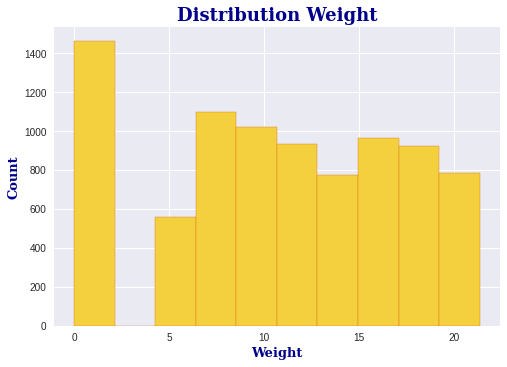

In [61]:
#Histograma para ver las distribuciones de diversas características en el conjunto de datos. 
#El siguiente histograma nos muestra que hay mayor numero de datos en el intervalo de 6-9 de peso, y menor frecuencia
# para el primer intervalode 5 a 6.
plt.style.use('seaborn')
df['Item_Weight'].hist(edgecolor='#D35400', color='#F4D03F')
plt.ylabel("Count", fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 13})
plt.xlabel("Weight",fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 13})
plt.title('Distribution Weight', fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})
plt.show()


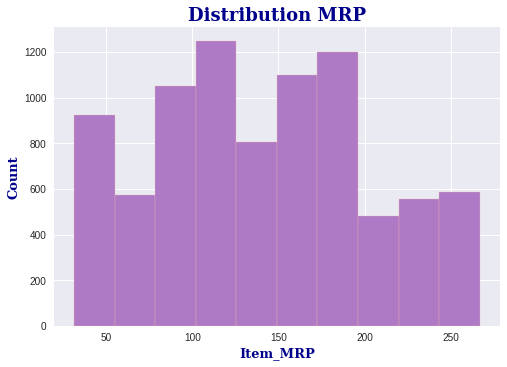

In [62]:
#En este histograma, en el que me muestra el plan de requerimiento de materiales, se observan unos picos para el intervalo
#100-120 y 170-200.
plt.style.use('seaborn')
df['Item_MRP'].hist(edgecolor='#F5B7B1', color='#AF7AC5')
plt.ylabel("Count", fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 13})
plt.xlabel("Item_MRP",fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 13})
plt.title('Distribution MRP', fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})
plt.show()

In [63]:
cont_grasa = df['Item_Weight'].values
cont_grasa # sacar arreglos

array([ 9.3 ,  5.92, 17.5 , ..., 10.6 ,  7.21, 14.8 ])

In [64]:
ventas_tienda = df['Item_Outlet_Sales'].values
ventas_tienda # sacar arreglos

array([3735.138 ,  443.4228, 2097.27  , ..., 1193.1136, 1845.5976,
        765.67  ])

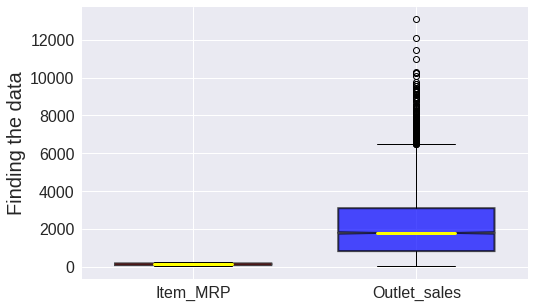

In [65]:
MRP = df['Item_MRP'].values #sacar en una variable la info de mi DF
Outlet_sales = df['Item_Outlet_Sales'].values
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([MRP, Outlet_sales],
           notch = True,
           labels=['Item_MRP', 'Outlet_sales'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=3, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .7)
          );
# The more you understand any library, the more you can do
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel('', fontsize = 20);
plt.ylabel('Finding the data', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

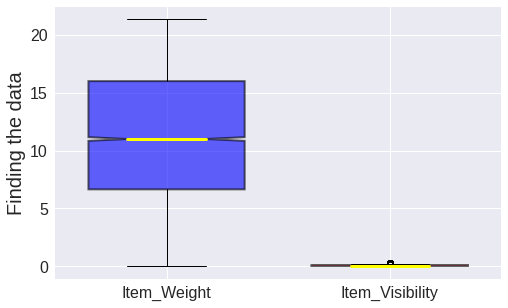

In [66]:
Weight = df['Item_Weight'].values #sacar en una variable la info de mi DF
Visibility = df['Item_Visibility'].values
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([Weight, Visibility],
           notch = True,
           labels=['Item_Weight', 'Item_Visibility'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=3, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .6)
          );
# The more you understand any library, the more you can do
boxplot1 = boxplots['boxes'][1]
boxplot1.set_facecolor('red')
plt.xlabel('', fontsize = 20);
plt.ylabel('Finding the data', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

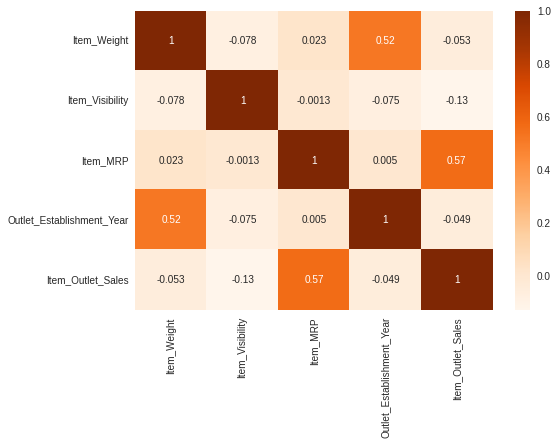

In [67]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Oranges', annot= True)

**VISUALIZACIONES PARA ANALISIS**

In [68]:
#Crear las visualizaciones
# get total sales per year
totalsales = df.groupby(['Outlet_Establishment_Year','Item_Type'])['Item_Outlet_Sales'].sum()
totalsales

Outlet_Establishment_Year  Item_Type    
1985                       Baking Goods     238305.7992
                           Breads           115466.3650
                           Breakfast         54194.7884
                           Canned           288889.9542
                           Dairy            278461.5288
                                               ...     
2009                       Others            37072.4098
                           Seafood           22166.4794
                           Snack Foods      278714.5328
                           Soft Drinks       88495.4728
                           Starchy Foods     33110.8998
Name: Item_Outlet_Sales, Length: 144, dtype: float64

In [94]:
# calcular el numero total de productos por año
numberUniqueYear = df.groupby(['Outlet_Establishment_Year'])['Item_Identifier'].nunique()
numberUniqueYear

Outlet_Establishment_Year
1985    1142
1987     932
1997     930
1998     555
1999     930
2002     929
2004     930
2007     926
2009     928
Name: Item_Identifier, dtype: int64

In [70]:
#Calcular los valores unicos de años
uniqueYears = list(numberUniqueYear.index)
uniqueYears

[1985, 1987, 1997, 1998, 1999, 2002, 2004, 2007, 2009]

In [95]:
#Calcular el numero total de productos para cada año
numproducts = list(numberUniqueYear.values)
numproducts

[1142, 932, 930, 555, 930, 929, 930, 926, 928]

In [120]:
#Calcular el total de ventas por año
total_anual_sales = df.groupby(['Outlet_Establishment_Year'])['Item_Outlet_Sales'].sum()
total_anual_sales

Outlet_Establishment_Year
1985    3632878
1987    2142201
1997    2117930
1998     188061
1999    2183490
2002    2036261
2004    2267660
2007    2167009
2009    1851354
Name: Item_Outlet_Sales, dtype: int64

In [119]:
df['Item_Outlet_Sales'] = df['Item_Outlet_Sales'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 799.2+ KB


In [72]:
#Calcular el total de ventas por año y por indice de contenido graso
total_sales_categorized = df.groupby(['Outlet_Establishment_Year','Item_Fat_Content'])['Item_Outlet_Sales'].sum()
total_sales_categorized

Outlet_Establishment_Year  Item_Fat_Content
1985                       Low Fat             2.320602e+06
                           Regular             1.313018e+06
1987                       Low Fat             1.410001e+06
                           Regular             7.326630e+05
1997                       Low Fat             1.322210e+06
                           Regular             7.961856e+05
1998                       Low Fat             1.246671e+05
                           Regular             6.367312e+04
1999                       Low Fat             1.390523e+06
                           Regular             7.934465e+05
2002                       Low Fat             1.293192e+06
                           Regular             7.435335e+05
2004                       Low Fat             1.471696e+06
                           Regular             7.964273e+05
2007                       Low Fat             1.369899e+06
                           Regular             7.975658e

In [105]:
sales_categorized = np.array(total_anual_sales.values)
sales_categorized

array([3633620.145 , 2142663.5782, 2118395.1682,  188340.1724,
       2183969.8102, 2036725.477 , 2268122.9354, 2167465.294 ,
       1851822.83  ])

In [125]:
#Se calcula el nivel de venta solo de los productos con indice bajo de contenido grasi, asi:
Low_filter = df['Item_Fat_Content']=='Low Fat'
low_content_sales = df.loc[Low_filter, :].groupby(['Outlet_Establishment_Year','Item_Fat_Content'])['Item_Outlet_Sales'].sum().head(20)
low_content_sales

Outlet_Establishment_Year  Item_Fat_Content
1985                       Low Fat             2320128
1987                       Low Fat             1409695
1997                       Low Fat             1321917
1998                       Low Fat              124487
1999                       Low Fat             1390213
2002                       Low Fat             1292889
2004                       Low Fat             1471395
2007                       Low Fat             1369599
2009                       Low Fat             1201005
Name: Item_Outlet_Sales, dtype: int64

In [124]:
#Se calcula el nivel de venta solo de los productos con indice Regular de contenido grasi, asi:
Regular_filter = df['Item_Fat_Content']=='Regular'
Regular_content_sales = df.loc[Regular_filter, :].groupby(['Outlet_Establishment_Year','Item_Fat_Content'])['Item_Outlet_Sales'].sum().head(20)
Regular_content_sales

Outlet_Establishment_Year  Item_Fat_Content
1985                       Regular             1312750
1987                       Regular              732506
1997                       Regular              796013
1998                       Regular               63574
1999                       Regular              793277
2002                       Regular              743372
2004                       Regular              796265
2007                       Regular              797410
2009                       Regular              650349
Name: Item_Outlet_Sales, dtype: int64

Text(0.5, 1.0, 'Sales Evolution by Fat Content Item')

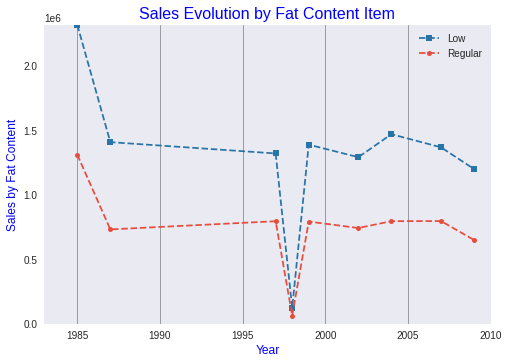

In [162]:
#Se grafica el comportamiento de las ventas de nuestros productos a traves del tiempo de acuerdo al indice de contenido
#graso.
#Se identifica que pata el año 1998 hay una marcada caida en las ventas.
plt.plot(uniqueYears, low_content_sales , marker = 's', markersize = 6, c = '#2874A6', linestyle = '--', label = 'Low')
plt.plot(uniqueYears, Regular_content_sales , marker = '.', markersize = 10, c = '#E74C3C', linestyle = '--', label = 'Regular')
plt.grid(c = '#909497', 
         alpha = .9,
         linestyle = '-')
plt.grid(axis = 'y')
plt.xlim(1983,2010)
plt.ylim(0,2320128)
plt.legend()
plt.xlabel('Year',color = 'b',fontsize = 12)
plt.ylabel('Sales by Fat Content',color = 'b', fontsize = 12)
plt.title('Sales Evolution by Fat Content Item', fontsize = 16, color = 'b')

In [164]:
#Revisar comportamiento de las ventas de acuerdo a la categoria del producto, asi:

product_category_sales = df.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().sort_values(ascending = False).head(20)
product_category_sales

Item_Type
Fruits and Vegetables    2819435
Snack Foods              2732195
Household                2055033
Frozen Foods             1825296
Dairy                    1522268
Canned                   1443824
Baking Goods             1265198
Health and Hygiene       1044938
Meat                      917356
Soft Drinks               892670
Breads                    553105
Hard Drinks               457685
Starchy Foods             351333
Others                    325431
Breakfast                 232245
Seafood                   148832
Name: Item_Outlet_Sales, dtype: int64

In [175]:
#Una vez identificado y ordenado de mayor a nivel el nivel de ventas por categoria de producto, comparamos el
#comportamiento de las ventas de los 2 productos con mayores ventas, en este caso los vegetales y los snacks.

#Nivel de ventas de frutas y vegetales
Fruits_filter = df['Item_Type']=='Fruits and Vegetables'
Fruits_sales = df.loc[Fruits_filter, :].groupby(['Outlet_Establishment_Year','Item_Type'])['Item_Outlet_Sales'].sum().sort_values(ascending = False).head(20)
Fruits_sales



Outlet_Establishment_Year  Item_Type            
1985                       Fruits and Vegetables    599978
1987                       Fruits and Vegetables    341461
1999                       Fruits and Vegetables    335043
2002                       Fruits and Vegetables    326338
2007                       Fruits and Vegetables    319440
1997                       Fruits and Vegetables    304688
2004                       Fruits and Vegetables    304576
2009                       Fruits and Vegetables    263407
1998                       Fruits and Vegetables     24504
Name: Item_Outlet_Sales, dtype: int64

In [176]:
#Nivel de ventas de los snacks

Snacks_filter = df['Item_Type']=='Snack Foods'
Snacks_sales = df.loc[Snacks_filter, :].groupby(['Outlet_Establishment_Year','Item_Type'])['Item_Outlet_Sales'].sum().sort_values(ascending = False).head(20)
Snacks_sales


Outlet_Establishment_Year  Item_Type  
1985                       Snack Foods    538629
2004                       Snack Foods    355509
1999                       Snack Foods    350170
2007                       Snack Foods    311016
1987                       Snack Foods    309181
2002                       Snack Foods    288376
2009                       Snack Foods    278651
1997                       Snack Foods    274755
1998                       Snack Foods     25908
Name: Item_Outlet_Sales, dtype: int64

Text(0.5, 1.0, ' Products by Fat Content Index')

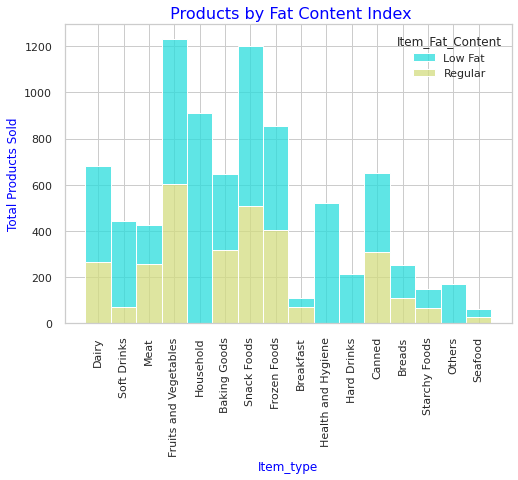

In [223]:
#Se grafican las categorias de producto mostrando el indice de contenido graso, soreprendentemente las frutas y los snacks 
#tienen un nivel de Contenido Regular Graso muy similar
sns.histplot(binwidth=0.5, x="Item_Type", hue="Item_Fat_Content", data=df, stat="count", multiple="stack", palette='rainbow')
plt.xticks(rotation = 90);
sep =10
plt.ylabel('Total Products Sold', c = 'blue')
plt.xlabel('Item_type', c = 'blue')
plt.title(' Products by Fat Content Index', fontsize= 16 , c= 'blue')

Text(0.5, 1.0, 'Sales Evolution Fruits and Snacks')

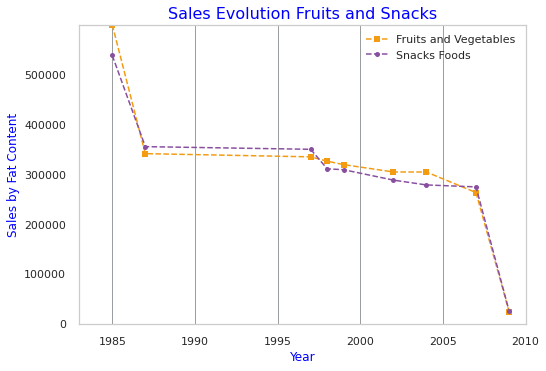

In [226]:
#El comportamiento de las ventas de estas 2 categorias de productos es muy similar, tan similar, que para el 2010
#caen las ventas al mismo nivel, y hay periodos de tiempo, donde el nivel de ventas de snacks es superior.
plt.plot(uniqueYears, Fruits_sales , marker = 's', markersize = 6, c = '#F39C12', linestyle = '--', label = 'Fruits and Vegetables')
plt.plot(uniqueYears, Snacks_sales , marker = '.', markersize = 10, c = '#884EA0', linestyle = '--', label = 'Snacks Foods')
plt.grid(c = '#909497', 
         alpha = .9,
         linestyle = '-')
plt.grid(axis = 'y')
plt.xlim(1983,2010)
plt.ylim(0,599978)
plt.legend()
plt.xlabel('Year',color = 'blue',fontsize = 12)
plt.ylabel('Sales by Fat Content',color = 'blue', fontsize = 12)
plt.title('Sales Evolution Fruits and Snacks', fontsize = 16, color = 'blue')

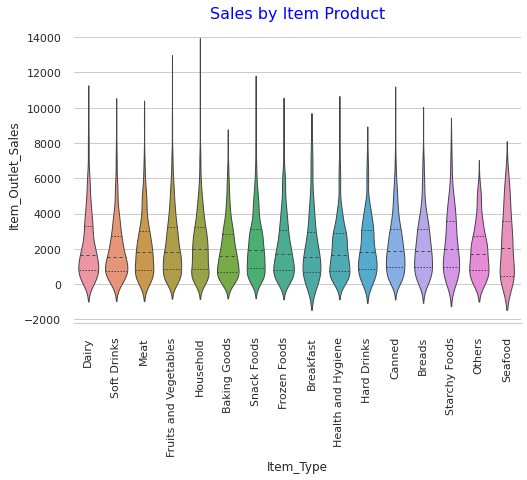

In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Material Apoyo/sales_predictions.csv')
df
sns.set_theme(style="whitegrid")
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=df, x="Item_Type", y="Item_Outlet_Sales", split=True, inner="quart", linewidth=1)
plt.xticks(rotation = 90);
plt.title('Sales by Item Product', fontsize = 16, color = 'blue')
sns.despine(left=True)